In [2]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [5]:
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(3.5, 4.5, (2, 10))

In [7]:
X1 = np.hstack((cluster1, cluster2)).T
X1

array([[0.80757114, 0.7588166 ],
       [1.45661786, 1.17197013],
       [0.67948376, 1.11711269],
       [0.95772859, 1.32266854],
       [1.42428114, 1.12396871],
       [1.0553183 , 0.62264613],
       [1.4296237 , 1.47616084],
       [1.17714805, 1.13811042],
       [1.02609673, 0.98216689],
       [0.99705616, 1.16419151],
       [3.50797089, 3.51306613],
       [4.12806475, 4.18730658],
       [4.16849344, 4.00770639],
       [3.88045644, 4.00590089],
       [3.53694027, 4.06085689],
       [3.65126065, 3.56390864],
       [3.68852919, 3.72898433],
       [4.23990919, 4.39297837],
       [3.63136878, 4.44151061],
       [3.59298966, 4.17547723]])

In [8]:
X2 = np.hstack((cluster1, cluster1)).T
X2

array([[0.80757114, 0.7588166 ],
       [1.45661786, 1.17197013],
       [0.67948376, 1.11711269],
       [0.95772859, 1.32266854],
       [1.42428114, 1.12396871],
       [1.0553183 , 0.62264613],
       [1.4296237 , 1.47616084],
       [1.17714805, 1.13811042],
       [1.02609673, 0.98216689],
       [0.99705616, 1.16419151],
       [0.80757114, 0.7588166 ],
       [1.45661786, 1.17197013],
       [0.67948376, 1.11711269],
       [0.95772859, 1.32266854],
       [1.42428114, 1.12396871],
       [1.0553183 , 0.62264613],
       [1.4296237 , 1.47616084],
       [1.17714805, 1.13811042],
       [1.02609673, 0.98216689],
       [0.99705616, 1.16419151]])

In [11]:
# Creating the input data:
X = np.vstack((X1, X2))
print(X.shape)
print(X)

(40, 2)
[[0.80757114 0.7588166 ]
 [1.45661786 1.17197013]
 [0.67948376 1.11711269]
 [0.95772859 1.32266854]
 [1.42428114 1.12396871]
 [1.0553183  0.62264613]
 [1.4296237  1.47616084]
 [1.17714805 1.13811042]
 [1.02609673 0.98216689]
 [0.99705616 1.16419151]
 [3.50797089 3.51306613]
 [4.12806475 4.18730658]
 [4.16849344 4.00770639]
 [3.88045644 4.00590089]
 [3.53694027 4.06085689]
 [3.65126065 3.56390864]
 [3.68852919 3.72898433]
 [4.23990919 4.39297837]
 [3.63136878 4.44151061]
 [3.59298966 4.17547723]
 [0.80757114 0.7588166 ]
 [1.45661786 1.17197013]
 [0.67948376 1.11711269]
 [0.95772859 1.32266854]
 [1.42428114 1.12396871]
 [1.0553183  0.62264613]
 [1.4296237  1.47616084]
 [1.17714805 1.13811042]
 [1.02609673 0.98216689]
 [0.99705616 1.16419151]
 [0.80757114 0.7588166 ]
 [1.45661786 1.17197013]
 [0.67948376 1.11711269]
 [0.95772859 1.32266854]
 [1.42428114 1.12396871]
 [1.0553183  0.62264613]
 [1.4296237  1.47616084]
 [1.17714805 1.13811042]
 [1.02609673 0.98216689]
 [0.99705616 1.16

In [12]:
# Hyperparameter values setting:
K = range(1, 10)
print(K)

range(1, 10)


In [23]:
mean_distortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    mean_distortions.append(sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0])

print(mean_distortions)

[1.5068830090639564, 0.33038302109616635, 0.2615144852219818, 0.2143985967504162, 0.18600763526292208, 0.15882099056851637, 0.1330743189945076, 0.10437330084281855, 0.09224227607004323]


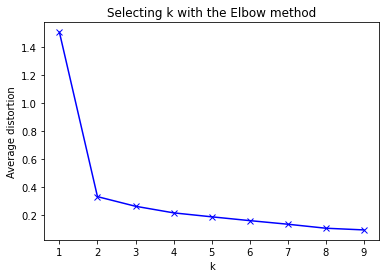

In [25]:
plt.plot(K, mean_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow method')
plt.show()

From the above graph, we could see a steep change of the loss(av distortion) vs k(number of clusters) at k=2. (analoguous to the shape of elbow). This point k=2 is the optimized hyperparameter value. 